# (Fordgo bike data exploration)
## by (Omnia Imam)

## Preliminary Wrangling

> This document explores a dataset including information about individual rides made in a bike-sharing system covering the greater San FranciscoBay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df= pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### What is the structure of your dataset?

> The data consists of 183412 rows and 16 columns 


### What is/are the main feature(s) of interest in your dataset?

> How long does the average trip take?, and does that depend on if a user is a subscriber or customer? and how can some other variables be relevant; (such as the gender of that user, or maybe their age..! )


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Start & End_time, duration_sec, User_type, member_gender, member_birth_year

### Dropping unneeded columns and remaining null values

In [6]:
df.drop(['start_station_id','start_station_name','end_station_id','end_station_name','start_station_latitude', 'start_station_longitude', 'end_station_latitude','end_station_longitude'], axis=1, inplace=True)
df.dropna(inplace=True)
print(df.info(),'\n\n\n',df.nunique(),'\n\n\n', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             175147 non-null  int64  
 1   start_time               175147 non-null  object 
 2   end_time                 175147 non-null  object 
 3   bike_id                  175147 non-null  int64  
 4   user_type                175147 non-null  object 
 5   member_birth_year        175147 non-null  float64
 6   member_gender            175147 non-null  object 
 7   bike_share_for_all_trip  175147 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 12.0+ MB
None 


 duration_sec                 4432
start_time                 175136
end_time                   175134
bike_id                      4635
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip       

### Adding some desirable attributes/features that can help support our invistigation..


* **Converting end & start times to date format, and creating an additional column to calculate time duration..**

In [7]:
# making a copy of the original dataframe to try applying some changes
df1= df.copy()
df1['end_time']= pd.to_datetime(df1['end_time'])
df1['start_time']= pd.to_datetime(df1['start_time'])

df1['diff']= df1['end_time'] - df1['start_time']
df1.head(1)

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,diff
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Customer,1984.0,Male,No,0 days 14:29:45.830000


* **Adding an additional column calculating members' ages..**

In [8]:
df1['member_age'] = 2019-df1['member_birth_year'].astype('int')
df1.drop('member_birth_year', axis=1, inplace=True)
df1.head(1)

,duration_sec,start_time,end_time,bike_id,user_type,member_gender,bike_share_for_all_trip,diff,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Customer,Male,No,0 days 14:29:45.830000,35


## Univariate Exploration


####1. **Plotting the distribution of durations of rides in minutes**


In [9]:
df1['diff'].describe()

count                       175147
mean     0 days 00:11:44.710840728
std      0 days 00:27:21.607874630
min         0 days 00:01:01.081000
25%         0 days 00:05:23.450500
50%         0 days 00:08:30.964000
75%         0 days 00:13:09.485500
max         0 days 23:29:08.051000
Name: diff, dtype: object

* **Adding an additional column calculating duration in minutes..**

In [10]:
df1['mins_diff']=df1['diff'].astype('timedelta64[m]')
df1['mins_diff'].describe()

count    175147.000000
mean         11.244971
std          27.361348
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: mins_diff, dtype: float64

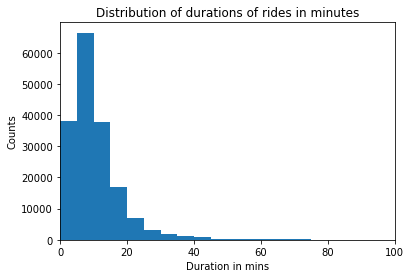

In [11]:
bins = np.arange(0,df1.mins_diff.max()+5,5)
plt.hist(data=df1, x= 'mins_diff', bins=bins);
plt.title('Distribution of durations of rides in minutes')
plt.xlabel('Duration in mins')
plt.ylabel('Counts')
plt.xlim(0,100);



> We can notice that the majority of rides do not exceed 20 mins; do not even reach them, with average time duration of 11.49 minutes.. 

>our plot is right skewed which indicates that with the increasement of durations, number of riders tends to decrease..



#### 2. **We may also be interested in knowing which days of the week are most likely to have more reservations recorded on**


In [12]:
df1['day']=df1['start_time'].dt.day_name()
df1.head(1)

,duration_sec,start_time,end_time,bike_id,user_type,member_gender,bike_share_for_all_trip,diff,member_age,mins_diff,day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Customer,Male,No,0 days 14:29:45.830000,35,869.0,Thursday


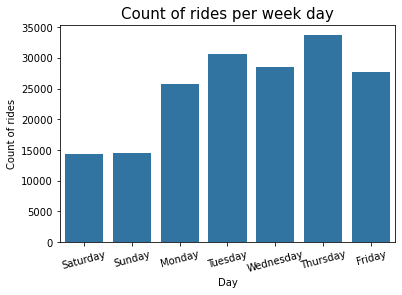

In [13]:
base_color= sb.color_palette()[0]
order= ['Saturday', 'Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday']
cat= pd.api.types.CategoricalDtype(ordered=True, categories=order)
df1['day']=df1['day'].astype(cat);

sb.countplot(data = df1, x = 'day',color = base_color);
plt.title('Count of rides per week day', fontsize = 15)
plt.xlabel('Day')
plt.ylabel('Count of rides');
plt.xticks(rotation=15);

> We can observe that the **majority** of rides are on reserved on (**Thursday** and **Tuesday**, respectively) , then on Wednesday, Friday and Monday, While having Saturday and Sunday with least frequencies of reservations..

####3. **Plotting the distribution of members' type**


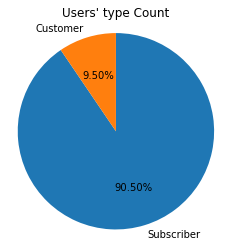

In [14]:
type_order= df1['user_type'].value_counts() 
plt.pie(type_order, labels = type_order.index, autopct= '%0.2f%%' , startangle = 90, counterclock = False);
plt.title("Users' type Count")
plt.axis('square');

> We can see that generally, the higher proportion of bike-riders are subscribers..

####4. **Plotting the distribution of members' gender**




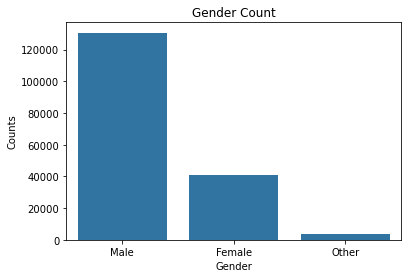

In [15]:
gender_order= df1['member_gender'].value_counts().index 
base_color=sb.color_palette()[0]
sb.countplot(data = df1, x = 'member_gender',color=base_color, order= gender_order)
plt.title("Gender Count")
plt.xlabel('Gender')
plt.ylabel('Counts');

>We can clearly see that male bike-riders are much more than female and others..

####5. **Plotting the distribution of members' ages**


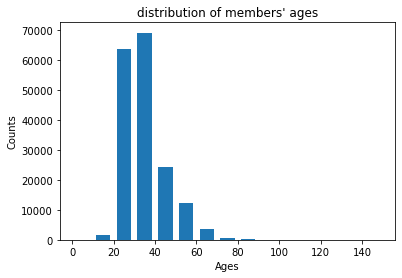

In [16]:
bin_edges = np.arange(0, df1['member_age'].max()+10, 10)
plt.hist(data=df1, x='member_age', bins = bin_edges, rwidth = 0.7);
plt.title("distribution of members' ages")
plt.xlabel('Ages')
plt.ylabel('Counts');

> There seem to be some age values that are far from the realistic range, **let's check for that..**

In [17]:
df1['member_age'].describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

> Yes, there are indeed some ages above the realistic range of human beings ages, so we will have to **drop these rows..**

In [18]:
df1.drop(df1[df1['member_age'] >= 100].index, inplace = True)
df1['member_age'].describe() 

count    175075.000000
mean         34.158778
std           9.972079
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          99.000000
Name: member_age, dtype: float64

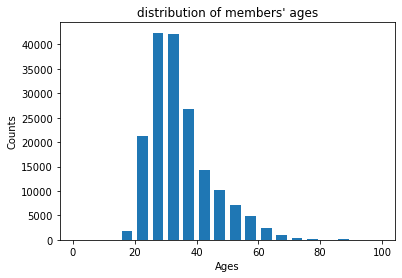

In [19]:
# Trying to plot the 'member_age' distribution once again with gaps between individual bars
bin_edges = np.arange(0, df1['member_age'].max()+5, 5)
plt.hist(data=df1, x='member_age', bins = bin_edges, rwidth = 0.7);
plt.title("distribution of members' ages")
plt.xlabel('Ages')
plt.ylabel('Counts');

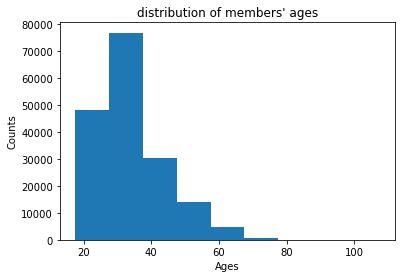

In [20]:
# Trying to plot the 'member_age' distribution once again with bin edges in between the observation values
bin_edges = np.arange(17.5, 99.5+10, 10)
plt.hist(data=df1, x='member_age', bins = bin_edges);
plt.title("distribution of members' ages")
plt.xlabel('Ages')
plt.ylabel('Counts');

>Most of the distribution fall within the range of 20-40 years old members, and we can also notice that our graph is considered right skewed; meaning that number of riders decreases as their ages increase..

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Yes, there was some wrangling/cleaning required for the data. 

* There were some columns with missing values that were already not needed in the analysis, so I dropped them, and I also dropped the remaining null-carrying rows. 

* There were some ages that were more than the realistic range of ages.

* There were some inappropriate datatypes such as time and date. 

* There were some new variables added from such as ,'min_diff', 'day' and 'member age' so that they can be used in the analysis.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


* Some birth years were unrealistic, such as that of (1879), where member's age then was 140! I dropped such rows. 

* Start & End times also had inappropriate data types, so I changed that to datetime format. 

* I also removed rows with missing values in 'member_gender' and 'member_age' columns as they are crucial in the analysis.

## Bivariate Exploration


#### 1. **First of all, let's have a look at the relationship between types of users and time they spend riding bikes**


* **I will use bar and point plots here as I need the interpretaion of the mean value of duration minutes against the type of user more..** 

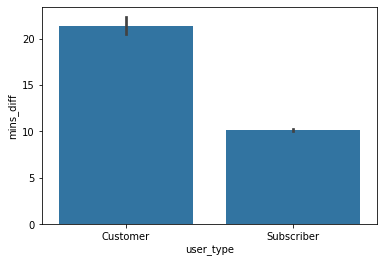

In [21]:
colors= sb.color_palette()[0]
sb.barplot(data=df1, x='user_type', y='mins_diff', color= colors);

* Use point plot as the minimum time duration is 1 minute; we don't start from 0..

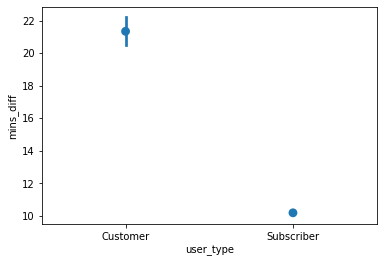

In [22]:
sb.pointplot(data=df1, x='user_type', y='mins_diff', color=base_color, linestyles="");

> We can clearly observe that on average, customers spend more time riding bikes than subscribers

#### 2. **Let's now have a look at the relationship between types of users and days of week they mostly reserve rides on**




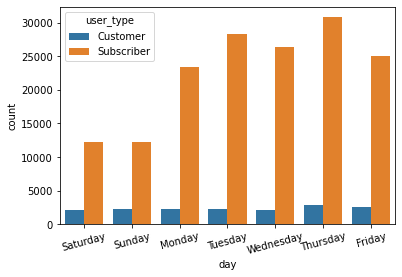

In [23]:
# since we already have our 'day' column converted into ordered categorical type, we are going to plot immediately
sb.countplot(data = df1, x = 'day', hue = 'user_type');
plt.xticks(rotation=15);

* Using Heat map

In [24]:
counts = df1.groupby(['day', 'user_type']).size()
counts = counts.reset_index(name='count')
counts = counts.pivot(index = 'day', columns = 'user_type', values = 'count')
counts

user_type,Customer,Subscriber
day,,
Saturday,2183,12256
Sunday,2304,12220
Monday,2323,23352
Tuesday,2281,28320
Wednesday,2117,26328
Thursday,2875,30851
Friday,2543,25122


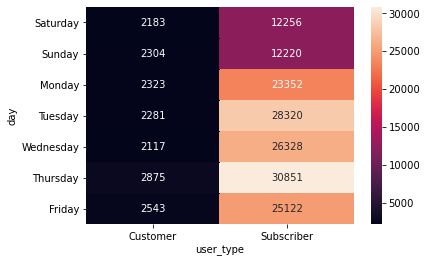

In [25]:
sb.heatmap(counts, annot = True, fmt = 'd');

> We can still obviously notice-from both plots that subscribers are much more than customers, and that "Thursday" is still the most frequent day of reserving rides for both types, followed by "Friday" for customers, and "Tuesday" for subscribers..

#### 3. **Now let's see the relationship between week days and trip duration**




In [26]:
group_means = df1[['day', 'mins_diff']].groupby(['day']).mean()
group_order = group_means.sort_values(['mins_diff'], ascending = False).index
group_means

,mins_diff
day,
Saturday,13.687790
Sunday,13.826838
Monday,11.127089
Tuesday,10.389693
Wednesday,10.590824
Thursday,10.816225
Friday,10.867305


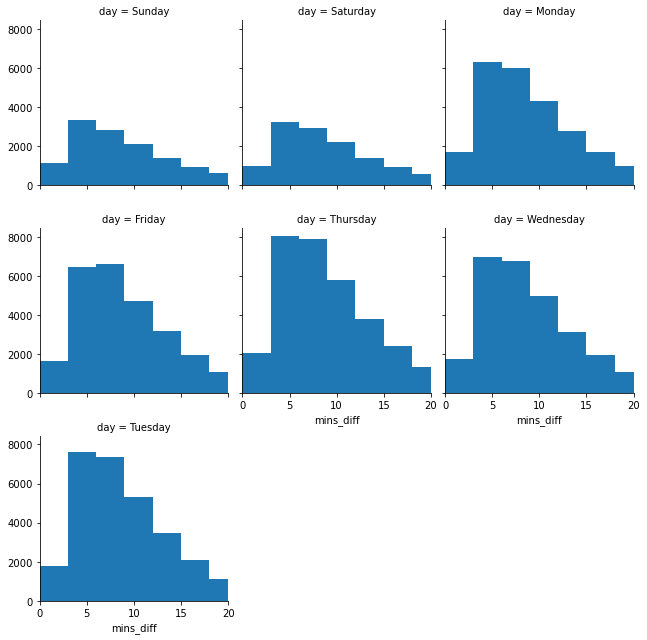

In [27]:
bins= np.arange(0, df1['mins_diff'].max()+3, 3)
g = sb.FacetGrid(data = df1, col = 'day',col_wrap=3,  col_order = group_order)
g.map(plt.hist, "mins_diff", bins= bins);
plt.xlim(0,20);

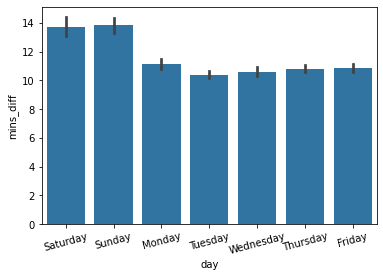

In [28]:
sb.barplot(data=df1, x='day', y='mins_diff', color=base_color);
plt.xticks(rotation=15);

>"Sunday" is the day with the highest average of trip duration in minutes, followed by "Saturday", then "Monday". The rest of week days are so close in average durations

#### 4. **Relationship between members' gender and trip duration**

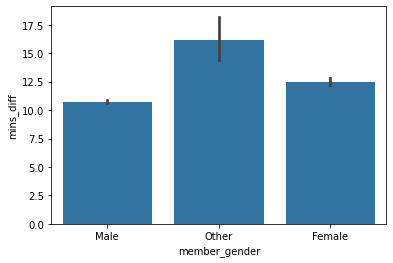

In [29]:
sb.barplot(data=df1, x='member_gender', y='mins_diff', color=base_color);

> "Other" gender seems to spend the highest average of time duration in riding bikes, followed by females, then males.

#### 5. **Relationship between members' ages and trip duration**

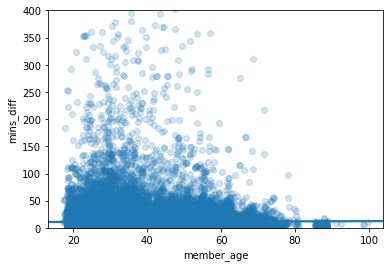

In [30]:
sb.regplot(data = df1, x = 'member_age', y = 'mins_diff', truncate=False, x_jitter=0.7,scatter_kws={'alpha':1/5});
plt.ylim(0,400);

>We can observe here that most users of different ages ride less than 150 minutes,  but most of those few high duration points are mostly observed in ages less than 60.

* Using Heat map

In [31]:
df1['mins_diff'].describe(), df1['member_age'].describe()

(count    175075.000000
 mean         11.245295
 std          27.366512
 min           1.000000
 25%           5.000000
 50%           8.000000
 75%          13.000000
 max        1409.000000
 Name: mins_diff, dtype: float64,
 count    175075.000000
 mean         34.158778
 std           9.972079
 min          18.000000
 25%          27.000000
 50%          32.000000
 75%          39.000000
 max          99.000000
 Name: member_age, dtype: float64)

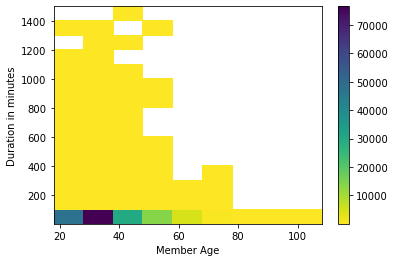

In [32]:
bins_x= np.arange(18,99+10, 10 )
bins_y= np.arange(1, 1409+100, 100)

h2d= plt.hist2d(data= df1, x= 'member_age', y ='mins_diff', cmap='viridis_r', cmin=0.5, bins = [bins_x, bins_y]);
plt.colorbar();
plt.xlabel('Member Age')
plt.ylabel('Duration in minutes');

> We can observe from both the scatter plot and heat map that most frequent bike riders are aged between 20 and 60. And that Higher durations are mostly observed with younger members.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
 
* after seeing the relationship between user type and trip durations customers occupy higher duration than subscribers.

* Back to the relationship between members' gender and trip duration, females spend more time riding bikes than males, with the "Other" gender recording the hieghst average riding time.

* Back to the relationship between members' age and trip duration, most frequent bike riders are aged between 20 and 60. And Higher durations are mostly observed with younger members.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
* Yes, I analyzed the relationship between durations of trips and weekdays, and came up with a conclusion that "Sunday" is the day with the highest average of trip duration , followed by "Saturday", then "Monday".

* I also analyzed the relationship between user type and weekdays, and concluded that subscribers are much more than customers, with "Thursday" being the most frequent day of reserving rides for both types, followed by "Friday" for customers, and "Tuesday" for subscribers.

## Multivariate Exploration

#### 1. **Relationship between member age , gender and trip duration**

F:\Programs\Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


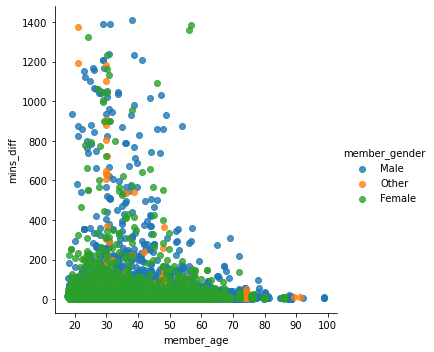

In [33]:
g =sb.FacetGrid(data =df1,hue = 'member_gender',size = 5);
g.map(sb.regplot,'member_age','mins_diff',  x_jitter= 0.3, fit_reg= False);
g.add_legend();

> We can tell that higher durations are occupied by ages mostly less than 60 . And females are most probably the most frequent gender to spend up to 200 minutes riding bikes; but that is still not clear enough due to the overplotting.

* **Trying Faceting method**

F:\Programs\Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


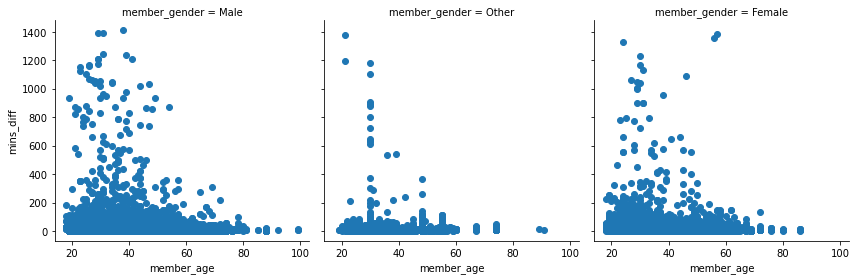

In [34]:
g = sb.FacetGrid(data = df1, col = 'member_gender', size = 4);
g.map(plt.scatter, 'member_age', 'mins_diff');

>We can conclude that "**Other**" gender is considered the **lowest aged** riding bikes gender , followed by **Females** then **Males**.

>There's no really obvious effect on duration based on gender. It may only be that there are **more data points of males of ages less than 50, that were observed to have spent high durations of time**..

#### 2. **Relationship between user type, gender and weekday usage.**

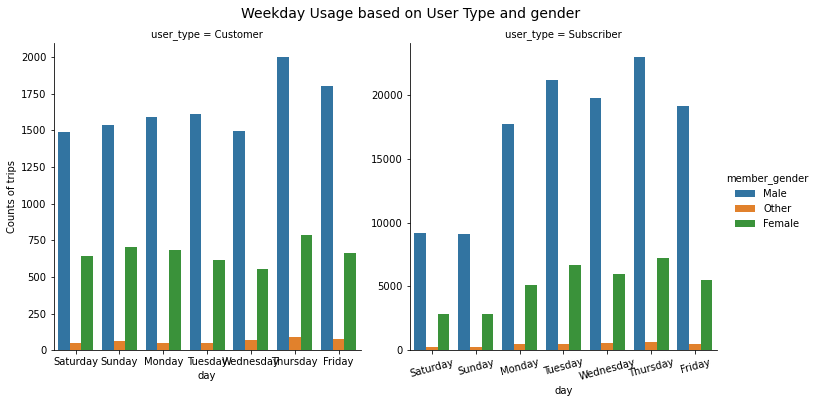

In [35]:
g = sb.catplot(data=df1, x='day', col="user_type",hue='member_gender', sharey = False, kind='count', order = order)
plt.xticks(rotation=15);
g.set_axis_labels("day", "Counts of trips")
g.fig.suptitle('Weekday Usage based on User Type and gender', y=1.03, fontsize=14);

>We can clearly observe that generally, subscribers are much more than customers, and males are making more bike trips than females and others; as a nature result of the higher number of males and subscribers in the program.

> The trend between customers and subscribers of each gender is a bit similar. 

>"**Thursday**" is still **the most frequent day of reserving rides for both types**, followed by **"Friday" for customers**, and **"Tuesday" for subscribers**. 

>We can also notice that unlike subscribers, **customers** of all genders **use the service on "Saturdays" and "Sundays" more often** compared to their use of it on rest of the days. **Subscribers scarcely use it on these days**..


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The main features we discovered in this part were: **trip duration**, **member gender**, **member age** and **user type**.

>The multivariate charts reinforced the earlier relationships that were observed; **Thursday** is the **most frequent day of reserving rides for both types**, followed by **"Friday" for customers**, and **"Tuesday" for subscribers**. This was **not influenced by gender**.

>"**Other**" gender is considered the **lowest aged** riding bikes gender , followed by **Females** then **Males**. There's no obvious effect on duration based on gender, except that there are **a bit more data points of males of ages less than 50, that were observed to have spent high durations of time**..


### Were there any interesting or surprising interactions between features?

> Yes, we observed that some of the heighst durations is of users at age of about 60 years old.

### In Conclusion,  regarding our features of interest(**user_type, average trip duration**):

>* The majority of rides do not exceed 20 mins; with **average time duration of 11.49 minutes**. With the **increasement** of trip **durations**, **number of riders** tends to **decrease**.

>* **most users are subscribers** ,They both prefer using the Bikeshare on **Thursdays**, followed by **"Friday" for customers**, and **"Tuesday" for subscribers**.

>* **customers take longer ride duarations** than subscribers.

>* **higher durations** are occupied by ages mostly **less than 60** .

>* gender almost has no effect on the data compared to age and user_type, except that **number of males** is generally **higher** than females and others..